In [1]:
# Preferible ejecutarlo en la computadora
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Link para descargar el dataset de Perros y gatos:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [3]:
img_array = cv2.imread('/content/drive/MyDrive/Colab/DL/dog_example.jpeg', cv2.IMREAD_GRAYSCALE)
print(img_array.shape)

(1000, 825)


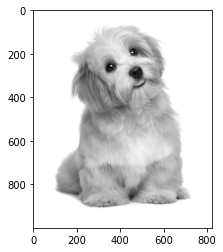

In [4]:
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!

In [7]:
DATADIR = '/content/drive/MyDrive/Colab/DL/PetImages/'

CATEGORIES = ["Cat"]

path = os.path.join(DATADIR,CATEGORIES[0])
print(path)
#print(os.listdir(path))
print(len(os.listdir(path)))


/content/drive/MyDrive/Colab/DL/PetImages/Cat
12501


/content/drive/MyDrive/Colab/DL/PetImages/Dog/9119.jpg


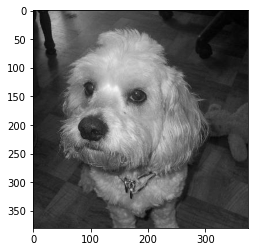

In [ ]:
img = '9119.jpg'
img_path = os.path.join(path,img)
print(img_path)

img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!"""

In [ ]:
IMG_SIZE = 50

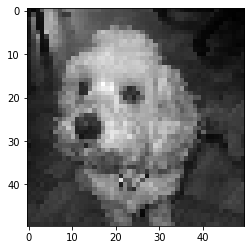

In [ ]:
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
  path = os.path.join(DATADIR,category)  # create path to dogs and cats
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')  # graph it
    plt.show()  # display!"""

    break # Enough
  break

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

    for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
      try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, class_num])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
        pass
      #except OSError as e:
      #    print("OSErrroBad img most likely", e, os.path.join(path,img))
      #except Exception as e:
      #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [51:41<00:00,  4.03it/s]

0


In [ ]:
import random

random.shuffle(training_data)

NameError: ignored

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)